Description:

The focus is on predicting the quality of wine based on its chemical characteristics, offering a
real-world application of machine learning in the context of viticulture. The dataset
encompasses diverse chemical attributes, including density and acidity, which serve as the
features for three distinct classifier models.


Key Concepts and Challenges:

Classifier Models: Utilizing Random Forest, Stochastic Gradient Descent, and Support
Vector Classifier (SVC) for wine quality prediction.
1.
2.Chemical Qualities: Analyzing features like density and acidity as predictors for wine quality.
Data Analysis Libraries: Employing Pandas for data manipulation and Numpy for array
operations.
3.
Data Visualization: Using Seaborn and Matplotlib for visualizing patterns and insights in the
dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df=pd.read_csv('/content/WineQT.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df=df.drop('Id',axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.describe().T.style.background_gradient(cmap='cubehelix_r')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.000000,8.311111,1.747595,4.600000,7.100000,7.900000,9.100000,15.900000
volatile acidity,1143.000000,0.531339,0.179633,0.120000,0.392500,0.520000,0.640000,1.580000
citric acid,1143.000000,0.268364,0.196686,0.000000,0.090000,0.250000,0.420000,1.000000
residual sugar,1143.000000,2.532152,1.355917,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1143.000000,0.086933,0.047267,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1143.000000,15.615486,10.250486,1.000000,7.000000,13.000000,21.000000,68.000000
total sulfur dioxide,1143.000000,45.914698,32.782130,6.000000,21.000000,37.000000,61.000000,289.000000
density,1143.000000,0.996730,0.001925,0.990070,0.995570,0.996680,0.997845,1.003690
pH,1143.000000,3.311015,0.156664,2.740000,3.205000,3.310000,3.400000,4.010000
sulphates,1143.000000,0.657708,0.170399,0.330000,0.550000,0.620000,0.730000,2.000000


<ipython-input-8-5e03e747d716>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality',data=df,palette='Greens')


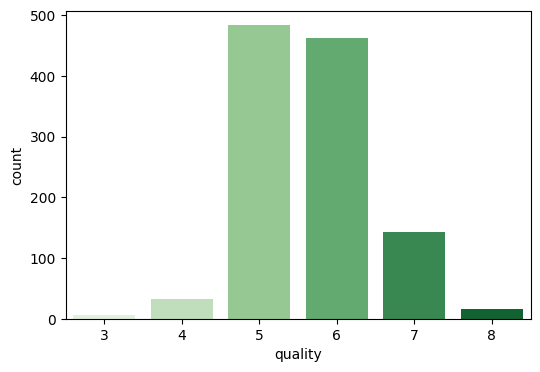

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='quality',data=df,palette='Greens')
plt.show()

Correlation Heatmap:

Visualizes correlation between variables in DataFrame df using a heatmap with annotations, showcasing strength and direction of relationships.

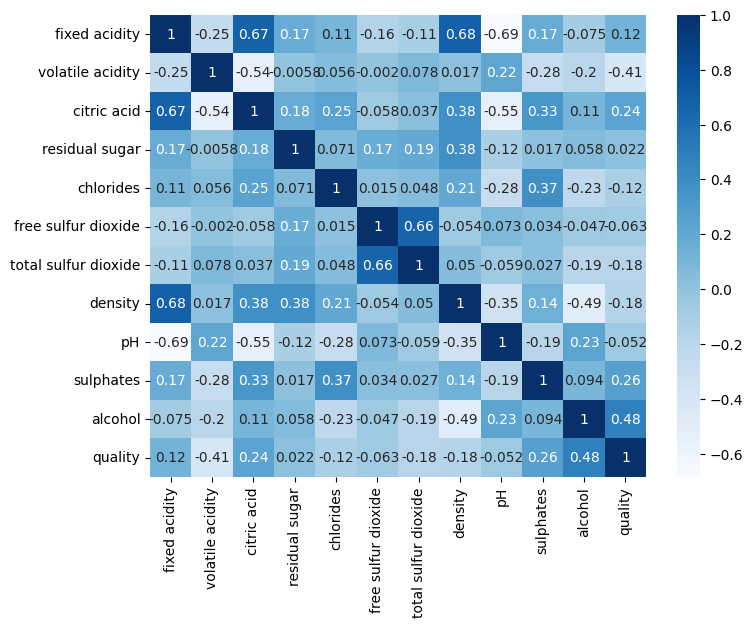

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

scatterplot

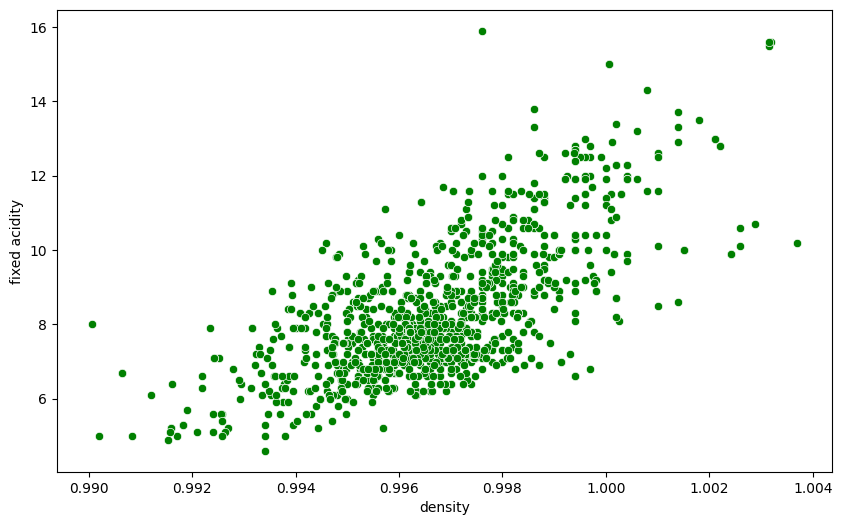

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='density',y='fixed acidity',data=df,color="Green")
plt.show()

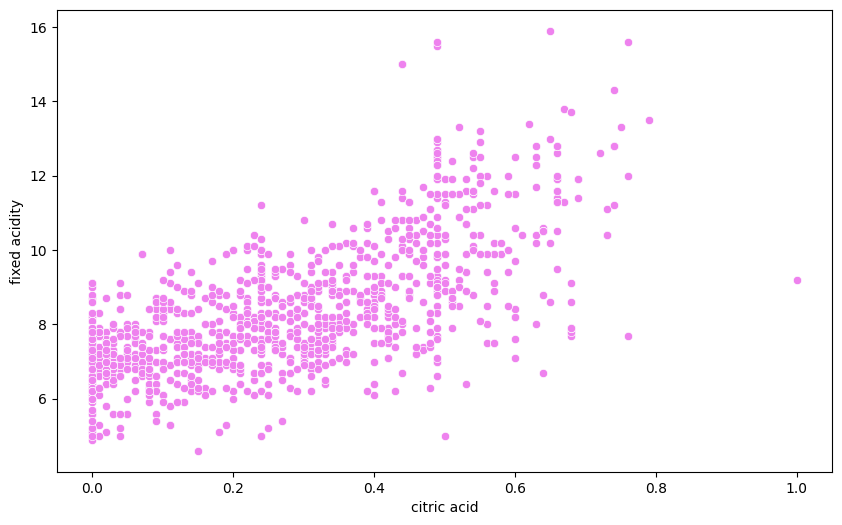

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='citric acid',y='fixed acidity',data=df,color="Violet")
plt.show()

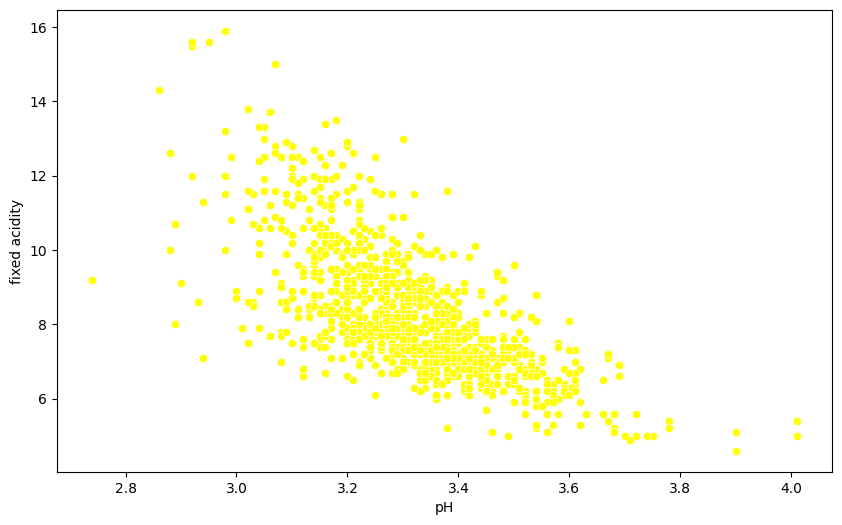

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='pH',y='fixed acidity',data=df,color="Yellow")
plt.show()

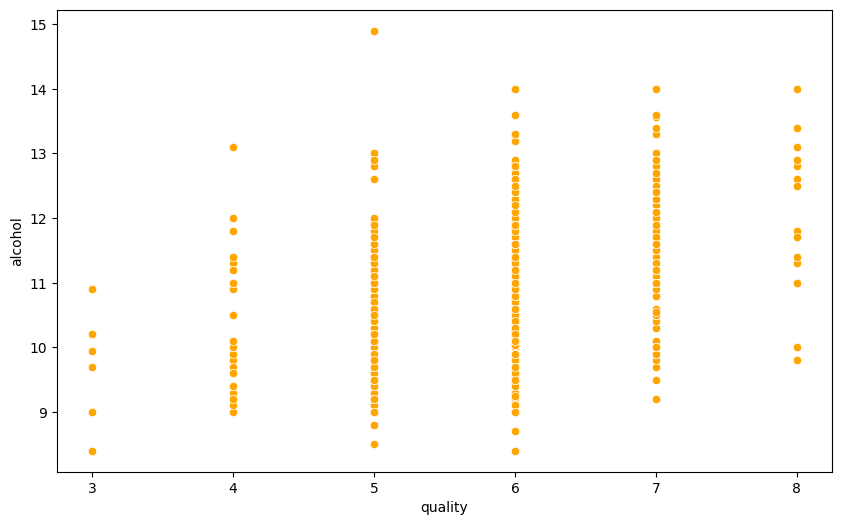

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='quality',y='alcohol',data=df,color="Orange")
plt.show()


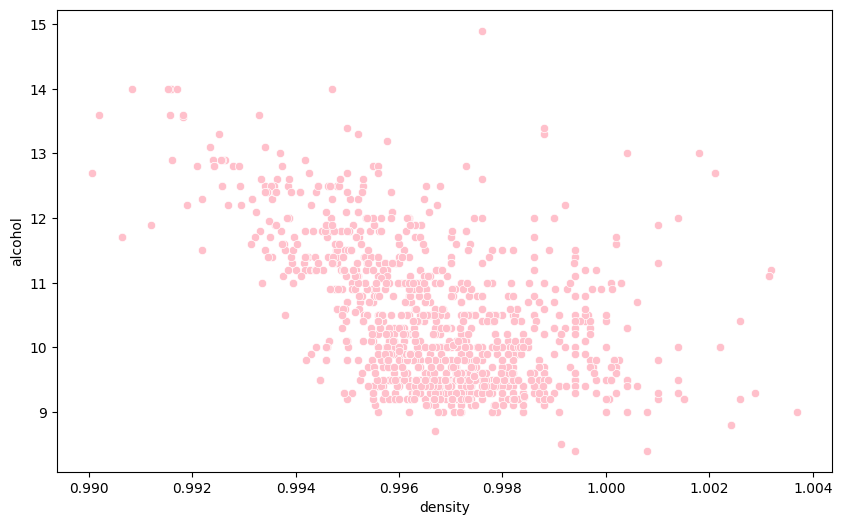

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='density',y='alcohol',data=df,color="Pink")
plt.show()

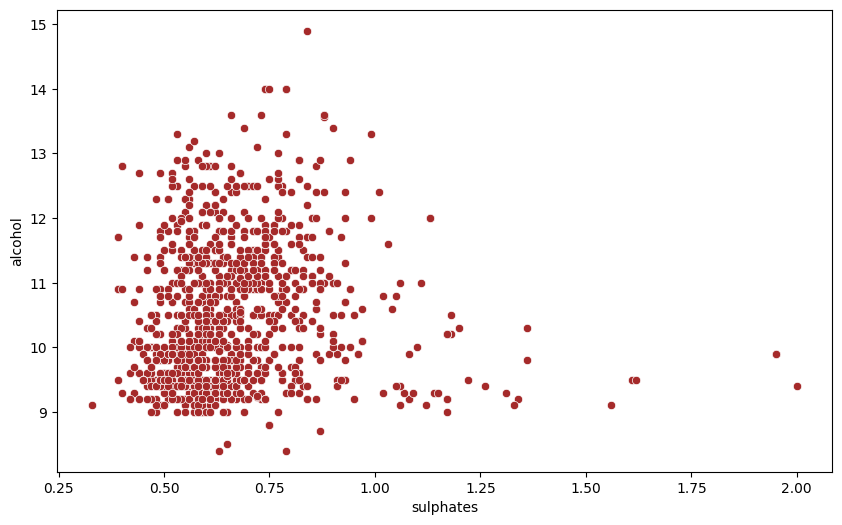

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='sulphates',y='alcohol',data=df,color="Brown")
plt.show()

boxplot

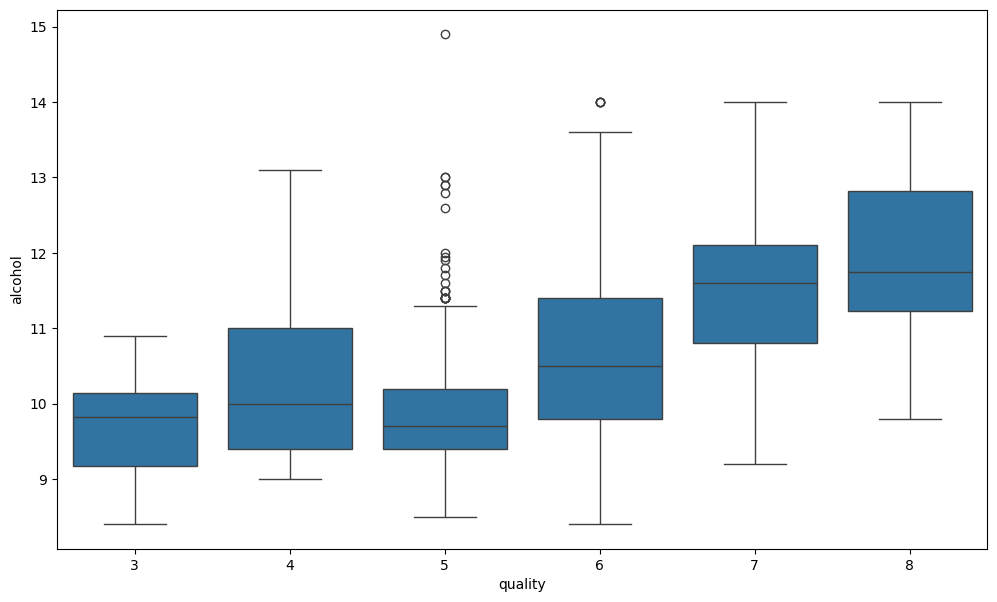

In [16]:
plt.figure(figsize=(12,7))
sns.boxplot(x='quality',y='alcohol',data=df)
plt.show()

splitting data

In [18]:
x = df.drop(["quality"],axis=1)
y = df["quality"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [20]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)
regpred = reg.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,regpred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.65      0.75      0.70        96
           6       0.59      0.65      0.62        99
           7       0.40      0.15      0.22        26
           8       0.00      0.00      0.00         2

    accuracy                           0.61       229
   macro avg       0.33      0.31      0.31       229
weighted avg       0.57      0.61      0.58       229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
print("Accuracy of Logistic Regression is : ",accuracy_score(y_test,regpred)*100)

Accuracy of Logistic Regression is :  61.135371179039296


Model Evaluation Metrics:

MAE: Average absolute difference between predicted and actual values.

MSE: Average squared difference between predicted and actual values.

RMSE: Square root of MSE, providing interpretable units.

R2 Score: Proportion of variance explained by the model.

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean Absolute Error : ",mean_absolute_error(y_test,regpred))
print("Mean Squared Error : ",mean_squared_error(y_test,regpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,regpred)))
print("R2 Score : ",r2_score(y_test,regpred))

Mean Absolute Error :  0.4148471615720524
Mean Squared Error :  0.4672489082969432
Root Mean Squared Error :  0.6835560754590242
R2 Score :  0.1603385648687552


Confusion Matrix Visualization:

Displays the confusion matrix generated by comparing actual and predicted values from y_test and regpred, with annotations and a colormap for clarity.

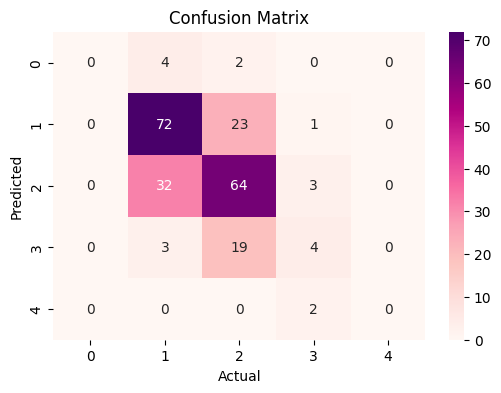

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,regpred),annot=True,cmap="RdPu")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

decision tree

In [26]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtreepred = dtree.predict(x_test)
print(classification_report(y_test,dtreepred))

              precision    recall  f1-score   support

           4       0.11      0.17      0.13         6
           5       0.64      0.62      0.63        96
           6       0.54      0.51      0.52        99
           7       0.45      0.54      0.49        26
           8       0.50      0.50      0.50         2

    accuracy                           0.55       229
   macro avg       0.45      0.47      0.46       229
weighted avg       0.56      0.55      0.55       229



In [27]:
print("Accuracy of Decision Tree is : ",accuracy_score(y_test,dtreepred)*100)

Accuracy of Decision Tree is :  55.021834061135365


In [28]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,dtreepred))
print("Mean Squared Error : ",mean_squared_error(y_test,dtreepred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,dtreepred)))
print("R2 Score : ",r2_score(y_test,dtreepred))

Mean Absolute Error :  0.49344978165938863
Mean Squared Error :  0.5895196506550219
Root Mean Squared Error :  0.7678018303279968
R2 Score :  -0.05938592282914068


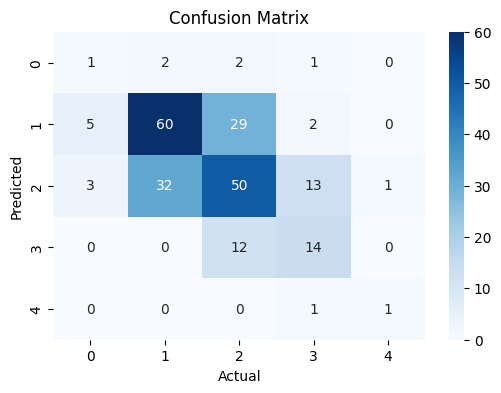

In [29]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,dtreepred),annot=True,cmap="Blues")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

Random Forest Classification:

Utilizes RandomForestClassifier from sklearn.ensemble to train a model with 100 decision trees. It predicts labels for test data and evaluates classification performance using classification_report and accuracy_score.

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rfpred = rf.predict(x_test)
print(classification_report(y_test,rfpred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.80      0.76        96
           6       0.67      0.68      0.67        99
           7       0.73      0.62      0.67        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.42      0.42      0.42       229
weighted avg       0.67      0.70      0.68       229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
print("Accuracy of Random Forest is : ",accuracy_score(y_test,rfpred)*100)

Accuracy of Random Forest is :  69.86899563318777


In [32]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,rfpred))
print("Mean Squared Error : ",mean_squared_error(y_test,rfpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,rfpred)))
print("R2 Score : ",r2_score(y_test,rfpred))

Mean Absolute Error :  0.32751091703056767
Mean Squared Error :  0.3799126637554585
Root Mean Squared Error :  0.6163705571776271
R2 Score :  0.31728462751010933



Confusion Matrix Visualization:

Illustrates the confusion matrix derived from comparing actual and predicted labels using RandomForestClassifier, with annotations and an "Oranges" colormap for clarity.

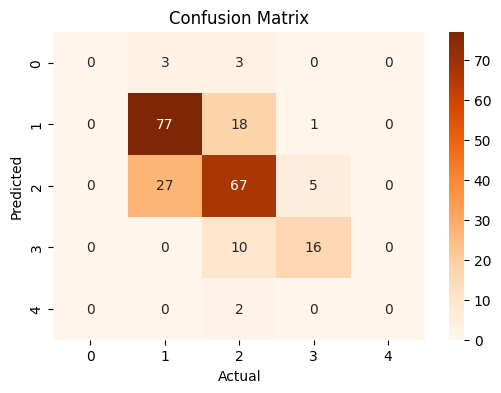

In [33]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,rfpred),annot=True,cmap="Oranges")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

Hyper Parameter Tuning

In [34]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [35]:
grid_search = GridSearchCV(RandomForestClassifier(),param_grid=param_grid)

In [36]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [37]:
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9)


In [38]:
model_grid = RandomForestClassifier(max_depth=9,max_features="log2",max_leaf_nodes=9,n_estimators=25)

In [39]:
model_grid.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9,
                       n_estimators=25)

In [40]:
y_pred_grid = rf.predict(x_test)

In [41]:
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           5       0.80      0.72      0.76       107
           6       0.68      0.67      0.67       100
           7       0.62      0.73      0.67        22
           8       0.00      0.00      0.00         0

    accuracy                           0.70       229
   macro avg       0.42      0.42      0.42       229
weighted avg       0.73      0.70      0.71       229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Performance Comparision

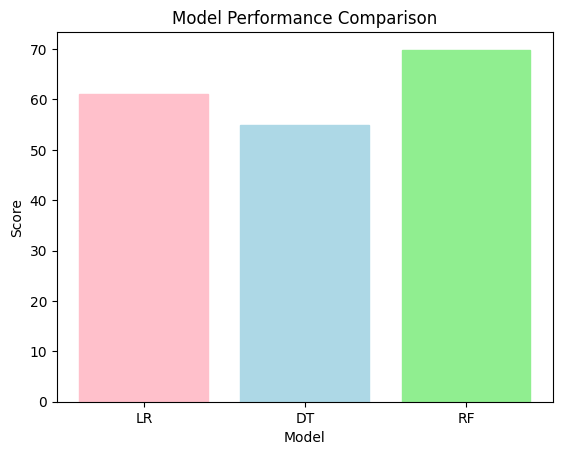

In [42]:
LR = accuracy_score(y_test,regpred)*100
DT = accuracy_score(y_test,dtreepred)*100
RF = accuracy_score(y_test,rfpred)*100

Model = ['LR','DT','RF']
Score = [LR, DT, RF]
barplot = plt.bar(x=Model,height=Score)
barplot[0].set_color("Pink")
barplot[1].set_color("Lightblue")
barplot[2].set_color("Lightgreen")
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.show()

Feature Importance Calculation:

Calculates the importance of features in RandomForestClassifier model and creates a DataFrame to display feature names and their respective importances, sorted in descending order.

In [43]:
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'feature': x.columns, 'importance': importances})

feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)

                 feature  importance
10               alcohol    0.144221
9              sulphates    0.115236
1       volatile acidity    0.107412
6   total sulfur dioxide    0.100982
7                density    0.088337
4              chlorides    0.083604
2            citric acid    0.076492
8                     pH    0.074786
0          fixed acidity    0.073764
3         residual sugar    0.070525
5    free sulfur dioxide    0.064642


Conclusion:

Model Performance Comparison: Random Forest demonstrates superior accuracy compared to Logistic Regression and Decision Tree models.

Feature Importance Analysis: "Alcohol," "sulphates," and "volatile acidity" emerge as pivotal features for predicting wine quality, highlighting their significant impact on overall quality.

Imbalanced Data: The dataset showcases a slight imbalance, emphasizing the need for addressing class imbalance to maintain model efficacy.

Impact of Hyperparameter Tuning: Although hyperparameter tuning may not drastically enhance overall accuracy, it positively influences precision, recall, and F1 score. This underscores its importance in improving the model's ability to correctly classify positive and negative instances.

Tuning Techniques Used: Employing GridSearchCV and RandomizedSearchCV facilitates exploring various hyperparameter combinations, leading to the identification of optimal configurations that maximize model performance metrics.

In summary, this analysis underscores the efficacy of Random Forest in predicting wine quality, identifies key features driving predictions, emphasizes the importance of addressing data imbalance, and highlights the positive impact of hyperparameter tuning on model performance.